In [172]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [173]:
with open('ultimate_data_challenge.json') as file:
    data1 = json.load(file)

In [174]:
df = pd.DataFrame(data1)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [175]:
col = df.columns.tolist
col

<bound method IndexOpsMixin.tolist of Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')>

In [176]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


## DATA WRANGLING

In [177]:
len(df)

50000

In [178]:
df = df.drop( df[df.avg_rating_by_driver.isna()==True].index, axis=0 )
len(df)/50000

0.99598

In [179]:
df = df.drop( df[df.avg_rating_of_driver.isna()==True].index, axis=0 )
len(df)/50000

0.83488

In [180]:
df = df.drop( df[df.avg_surge.isna()==True].index, axis=0 )
len(df)/50000

0.83488

In [181]:
df = df.drop( df[df.surge_pct.isna()==True].index, axis=0 )
len(df)/50000

0.83488

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
city                      41744 non-null object
last_trip_date            41744 non-null object
phone                     41445 non-null object
signup_date               41744 non-null object
surge_pct                 41744 non-null float64
trips_in_first_30_days    41744 non-null int64
ultimate_black_user       41744 non-null bool
weekday_pct               41744 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.9+ MB


#### Riders who 'signed up' for an Ultimate account in January 2014

#### Q01

In [183]:
df1 = df[ df['signup_date']>= "2014-01-07"]
len(df1)/50000

0.69016

In [184]:
df11 = df1[ df1['last_trip_date'] <= "2014-02-07"]
len(df11)/50000

0.14138

In [185]:
fraction_retained = len(df11)/len(df1)
fraction_retained 

0.2048510490321085

### So 20.5% was retained 

In [186]:
df22 = df1[ df1["last_trip_date"]>"2014-02-07"]
len(df22)/50000

0.54878

#### df11 is the group who took rides within 30 days after sign up on Jan 07, 2014
#### df22 is the group who did not take a ride within 30 days after sign up on Jan 07, 2014

In [187]:
city_Y = df11["city"].value_counts()/df11["city"].value_counts().sum()
city_Y

Winterfell        0.482105
Astapor           0.379969
King's Landing    0.137926
Name: city, dtype: float64

In [188]:
len(df11)

7069

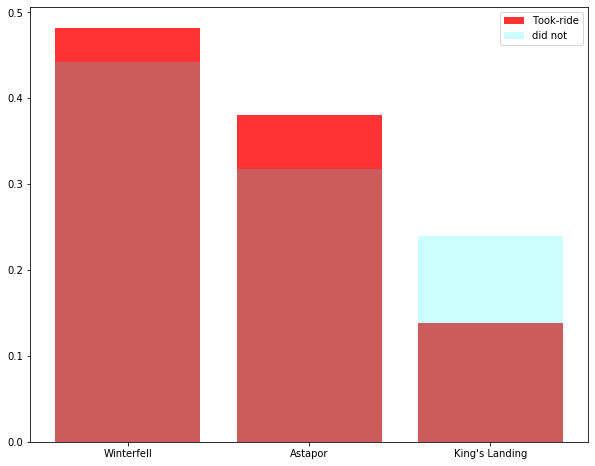

In [189]:
plt.figure(figsize=(10,8))
plt.bar(city_Y.index, city_Y.values, label="Took-ride", color='red', alpha=0.8)
plt.bar(city_N.index, city_N.values, label="did not", color='cyan', alpha=0.2)
plt.legend()
plt.show()

## INFERENTIAL STATISTICS

In [190]:
import scipy
from scipy.stats import norm, ttest_ind

In [191]:
df11_c1 = df11[ df11['city'] == "Winterfell"]
df11_c2 = df11[ df11['city'] == "Astapor"]
df11_c3 = df11[ df11['city']=="King's Landing"]
len(df11_c1), len(df11_c2), len(df11_c3),  len(df11_c1)+len(df11_c2)+len(df11_c3) 

(3408, 2686, 975, 7069)

### City : Winterfell

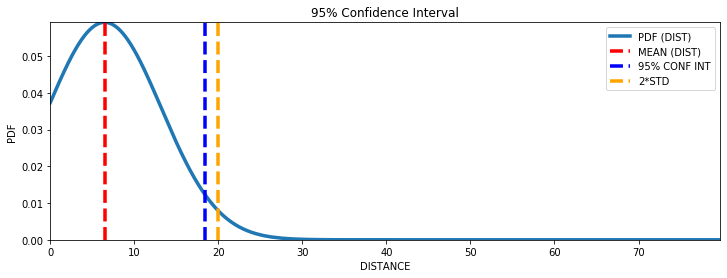

In [192]:
dist = np.sort(df11_c1['avg_dist'])
dist_pdf = norm.pdf(dist, loc=np.mean(dist), scale=np.std(dist))
dist_cdf = norm.cdf(dist, loc=np.mean(dist), scale=np.std(dist))
plt.figure(figsize=(12,4))
plt.plot(dist, dist_pdf, label='PDF (DIST)',linewidth=3.5)
plt.axvline(np.mean(dist), linestyle='--', color='red', label='MEAN (DIST)', linewidth=3.5)
plt.axvline(np.percentile(dist, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
plt.axvline(np.mean(dist)+2*np.std(dist), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('95% Confidence Interval')
plt.xlabel('DISTANCE')
plt.ylabel('PDF')
plt.show()

#### 95% Confidence interval WRT the MEAN is close to 2*STD 

In [193]:
df11["city"].value_counts()

Winterfell        3408
Astapor           2686
King's Landing     975
Name: city, dtype: int64

### Comparison: Winterfell, King's Landing 

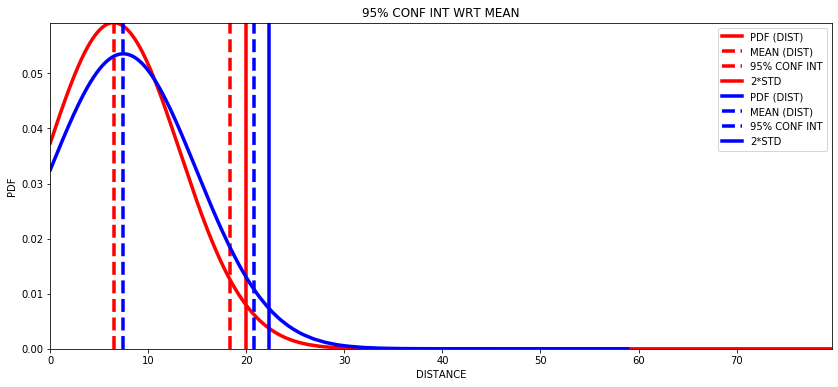

In [194]:
dffs = [df11_c1, df11_c3]  # df11_c1, df11_c2, df11_c3
idx = 0
colr_data = ['red', 'blue']
ctty = ["Winterfell", "King's Landing"]
plt.figure(figsize=(14,6))

for itm in dffs:
    dist = np.sort(itm['avg_dist'])
    dist_pdf = norm.pdf(dist, loc=np.mean(dist), scale=np.std(dist))
    dist_cdf = norm.cdf(dist, loc=np.mean(dist), scale=np.std(dist))
    plt.plot(dist, dist_pdf, label='PDF (DIST)',linewidth=3.5, color=colr_data[idx] ) # label= ctty[idx]
    plt.axvline(np.mean(dist), linestyle='--', color=colr_data[idx], label='MEAN (DIST)', linewidth=3.5)
    plt.axvline(np.percentile(dist, [95]), linestyle='--', color=colr_data[idx], label='95% CONF INT',linewidth=3.5)
    plt.axvline(np.mean(dist)+2*np.std(dist), linestyle='-', color=colr_data[idx], label='2*STD',linewidth=3.5)
    plt.autoscale(enable=True, tight=True)
    plt.legend()
    plt.ylabel('PDF')
    plt.xlabel('DISTANCE')
    plt.title('95% CONF INT WRT MEAN')
    idx += 1

### TEST

In [195]:
ttest_ind(df11_c1["avg_dist"], df11_c3["avg_dist"], equal_var=False)

Ttest_indResult(statistic=-3.6983644043774735, pvalue=0.0002250354399357743)

##### Test shows the rider groups of Winterfell and King's Landing city are different 

#### phone type 

In [196]:
phone_Y = df11['phone'].value_counts()/df11['phone'].value_counts().sum()
phone_Y

iPhone     0.610968
Android    0.389032
Name: phone, dtype: float64

In [197]:
phone_N = df22['phone'].value_counts()/df22['phone'].value_counts().sum()
phone_N

iPhone     0.728807
Android    0.271193
Name: phone, dtype: float64

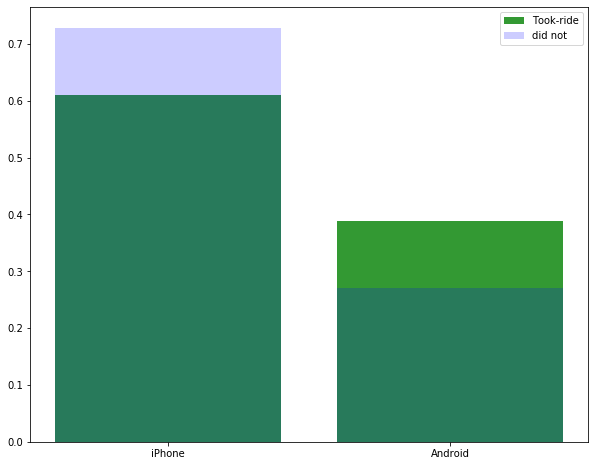

In [198]:
plt.figure(figsize=(10,8))
plt.bar(phone_Y.index, phone_Y.values, label="Took-ride", color='green', alpha=0.8)
plt.bar(phone_N.index, phone_N.values, label="did not", color='blue', alpha=0.2)
plt.legend()
plt.show()

### Modeling 

In [199]:
from datetime import timedelta
import calendar

In [200]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [201]:
df['active'] = df['last_trip_date'] - df['signup_date'] > timedelta(150)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


In [202]:
df['active'] = df['active'].astype(int)
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,5.465312,4.776648,4.601801,1.073697,8.884695,2.611393,61.304437,0.271057
std,5.149810,0.404109,0.616079,0.198681,18.309042,4.060121,34.799944,0.444511
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000,0.000000
50%,3.790000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000,1.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [203]:
dff1 = df.drop(['signup_date', 'last_trip_date'], axis=1)

In [204]:
dff1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


In [205]:
y = dff1['active']
X = dff1.drop(['active'], axis=1)

In [206]:
X.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'phone', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [207]:
dff2 = pd.get_dummies(X, columns=['city', 'phone', 'ultimate_black_user'])
dff2.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,5.465312,4.776648,4.601801,1.073697,8.884695,2.611393,61.304437,0.325795,0.211503,0.462701,0.289694,0.703143,0.614388,0.385612
std,5.149810,0.404109,0.616079,0.198681,18.309042,4.060121,34.799944,0.468677,0.408379,0.498613,0.453626,0.456878,0.486745,0.486745
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.790000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [208]:
dff2.describe().columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [209]:
cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'city_Astapor',
       "city_King's Landing", 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True']

In [210]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [211]:
std_sca = StandardScaler()
x = std_sca.fit_transform(dff2[cols]) 

In [212]:
np.shape(x), np.shape(y)

((41744, 14), (41744,))

In [213]:
x[0:5,:]

array([[-0.34862122,  0.55270806,  0.15939474,  0.13239201,  0.35585604,
         0.34201525, -0.43404143, -0.69514682,  1.93081726, -0.92798809,
        -0.63862712,  0.64975833, -1.26225126,  1.26225126],
       [ 0.54268441,  0.55270806,  0.64635127, -0.37093419, -0.48526849,
        -0.6431888 , -0.32484455,  1.43854502, -0.5179154 , -0.92798809,
         1.56585898, -1.53903376,  0.79223529, -0.79223529],
       [-0.91175549,  0.55270806, -0.48988063, -0.37093419, -0.48526849,
         0.09571423,  1.1119566 ,  1.43854502, -0.5179154 , -0.92798809,
        -0.63862712,  0.64975833,  0.79223529, -0.79223529],
       [-0.60300256,  0.30524737, -0.0029241 ,  0.33372249,  0.60710103,
         1.57352031,  0.53723614, -0.69514682,  1.93081726, -0.92798809,
        -0.63862712,  0.64975833, -1.26225126,  1.26225126],
       [-0.4534807 ,  0.30524737, -0.32756179,  0.58538559,  0.15922953,
         2.80502537,  0.60620259, -0.69514682, -0.5179154 ,  1.07760004,
         1.56585898, -1.53

In [214]:
y[0:10]

0     0
1     0
2     0
3     1
4     0
5     0
7     0
8     0
10    0
11    0
Name: active, dtype: int64

## MACHINE LEARNING MODEL

#### DecisionTreesClassifier   

In [215]:
from sklearn.model_selection import train_test_split
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size=0.40, random_state=100)

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [217]:
clf = DecisionTreeClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
Accuracy = accuracy_score(y_t, y_p)
print("Accuracy : ", str(Accuracy))

Accuracy :  0.6942747634447239


In [218]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     12140
           1       0.44      0.45      0.45      4558

   micro avg       0.69      0.69      0.69     16698
   macro avg       0.62      0.62      0.62     16698
weighted avg       0.70      0.69      0.70     16698



#### ExtraTreesClassifier

In [219]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
accuracy = accuracy_score(y_t, y_p)
print("Accuracy : ", str(accuracy))

Accuracy :  0.7352976404359803


In [220]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12140
           1       0.52      0.39      0.44      4558

   micro avg       0.74      0.74      0.74     16698
   macro avg       0.66      0.63      0.64     16698
weighted avg       0.72      0.74      0.72     16698



#### LogisticRegression

In [221]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
accuracy = accuracy_score(y_t, y_p)
print(" Accuracy : ", str(accuracy))
print(classification_report(y_t, y_p))

 Accuracy :  0.7410468319559229
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     12140
           1       0.57      0.21      0.30      4558

   micro avg       0.74      0.74      0.74     16698
   macro avg       0.67      0.57      0.57     16698
weighted avg       0.71      0.74      0.69     16698



#### GaussianNB

In [222]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t) 
accuracy = accuracy_score(y_t, y_p)
print("Accuracy : ", str(accuracy))
print(classification_report(y_t, y_p))

Accuracy :  0.6949335249730507
              precision    recall  f1-score   support

           0       0.84      0.72      0.77     12140
           1       0.46      0.63      0.53      4558

   micro avg       0.69      0.69      0.69     16698
   macro avg       0.65      0.67      0.65     16698
weighted avg       0.73      0.69      0.71     16698



#### SVC

In [223]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
roc = roc_auc_score(y_t, y_p)
accuracy = accuracy_score(y_t, y_p)
print("Accuracy Score : ", str(accuracy), "ROC Score : ", str(roc))
print(classification_report(y_t, y_p))

Accuracy Score :  0.7582345191040843 ROC Score :  0.6173049828930143
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     12140
           1       0.61      0.31      0.41      4558

   micro avg       0.76      0.76      0.76     16698
   macro avg       0.70      0.62      0.63     16698
weighted avg       0.74      0.76      0.73     16698



In [224]:
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
accuracy = accuracy_score(y_t, y_p)
print("Accuracy score : ", str(accuracy))
print(classification_report(y_t, y_p))

Accuracy score :  0.7443406395975566
              precision    recall  f1-score   support

           0       0.79      0.88      0.83     12140
           1       0.55      0.38      0.45      4558

   micro avg       0.74      0.74      0.74     16698
   macro avg       0.67      0.63      0.64     16698
weighted avg       0.72      0.74      0.73     16698



In [225]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Text(0, 0.5, 'True Positive Rate')

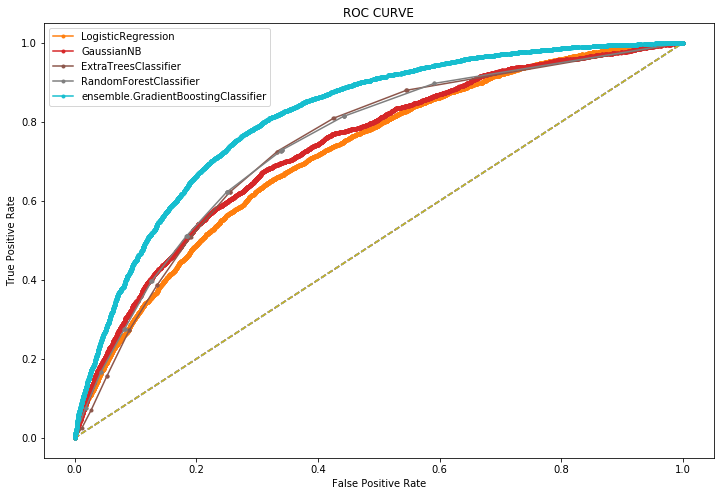

In [226]:
idx = 0
plt.figure(figsize=(12,8))
ns_probs = [0 for _ in range(len(y_t))] # no skill prediction 

MLclf = [LogisticRegression(), GaussianNB(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
lablist = ['LogisticRegression' , 'GaussianNB', 'ExtraTreesClassifier', 'RandomForestClassifier', 'ensemble.GradientBoostingClassifier']

roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    clf_probs = clf.predict_proba(x_t)
    clf_probs = clf_probs[:, 1]
    ns_auc = roc_auc_score(y_t, ns_probs)
    clf_auc = roc_auc_score(y_t, clf_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_t, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_t, clf_probs) 
    lab_p = lablist[idx] 
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=lab_p ) 
    pyplot.legend()
    idx += 1
    roc_list.append(roc_auc_score(y_t, y_p))
    

plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### We found the Ensemble Gradient Boosting Classifier is the best algorithm for the ML model

#### GridSearch

In [227]:
from numpy.random import seed
seed(47)
from sklearn.ensemble import GradientBoostingClassifier
test_sizee = np.arange(0.20, 0.45, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size=t_size, random_state=42)
        clf = ensemble.GradientBoostingClassifier()
        clf.fit(x_tr, y_tr)
        y_p = clf.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))

In [228]:
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]

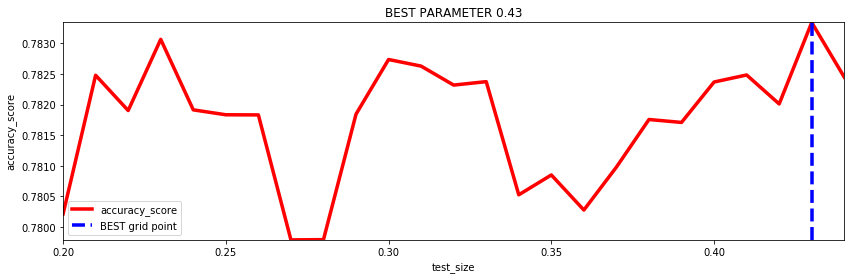

In [229]:
plt.figure(figsize=(14,4))
plt.plot(test_sizee,scores, color='red', linewidth=3.5, label='accuracy_score')
plt.axvline(test_sizee[ret_max(scores)[1]], linestyle='--', color='blue', linewidth=3.5, label='BEST grid point')
plt.autoscale(tight=True, enable=True)
plt.legend()
plt.title('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
plt.xlabel('test_size')
plt.ylabel('accuracy_score')
plt.show()

In [230]:
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size=0.43, random_state=42)

In [231]:
gbc = GradientBoostingClassifier(loss='deviance', n_estimators=50, min_samples_split=3)  
gbc.fit(x_tr, y_tr)
y_p = gbc.predict(x_t)
accuracy = accuracy_score(y_t, y_p) 
print(" Accuracy Score : ", str(accuracy))
print(classification_report(y_t, y_p))

 Accuracy Score :  0.7813370473537604
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     13124
           1       0.64      0.42      0.51      4826

   micro avg       0.78      0.78      0.78     17950
   macro avg       0.73      0.67      0.68     17950
weighted avg       0.77      0.78      0.76     17950



In [232]:
df['city'].value_counts()

Winterfell        19315
Astapor           13600
King's Landing     8829
Name: city, dtype: int64

## RESULTS AND RECOMMENDATIONS 

#### Based on the above analysis including visualization and inferential test we found Kings Landing riders retention is significantly lower that the other two cities

#### Also in terms of phone type we found android users take more frequent rides than iphone user.

#### Based on above analysis ML model was built to make predictions for riders activity (whether active in the next six months) and model predictions was validated by classification report.

#### We found GradientBoostingClassifier is the best algorithm for the ML model

#### To increase the rider retention rate in King's Landing experimentation might be carried on by offering them with reduced fare so that they would take more frequent rides 

#### Followed by experimentations, new analysis and test can be carried on to see whether it was a success

#### A more effective recommendation could be done if both origin and destinations cities are known 